In [2]:
from pathlib import Path

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import font_manager

# save numpy array as csv file
from numpy import asarray

%matplotlib inline

from dataviz import utility as dviz

In [6]:
# X GOOGLE COLAB
#base_path = Path('/content/drive/My Drive/AVRC/array_data/')
#if _FIRST_INIT:
#  from google.colab import drive
#  import sys
#  drive.mount("/content/drive/")


#############################################################
###############   MODIFICARE QUI PER IL PATH   ##############
base_path = Path('array_data/') # X USO LOCALE
#############################################################
#############################################################

## dataviz setup
FONT_DIR = "./dataviz/fonts"
font_files = font_manager.findSystemFonts(fontpaths=FONT_DIR)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)


MATPLOTLIB_THEME_FILE = "./dataviz/mpl_theme.mplstyle"
plt.style.use(MATPLOTLIB_THEME_FILE)

theme = {"colors":{
            "avg_line": "blue",
            "avg_line_alpha": 0.5
        }, 
        "sizes": {
            "box_width": 0.3
        }}

In [7]:
# Metodi di utility

def load_data(save_path):
  data = None
  with open(save_path, 'rb') as file_data:
    data = np.load(file_data, allow_pickle=True)
  return data

# Wrapper da usare
def load_aggregated_data(no_weight=False):
  if no_weight:
    return load_data(base_path/"aggregated/aggregated_data_noweight.npy")
  else:
    return load_data(base_path/"aggregated/aggregated_data.npy")

def load_temporal_data(no_weight=False):
  if no_weight:
    return load_data(base_path/"temporal/temporal_data_noweight.npy")
  else:
    return load_data(base_path/"temporal/temporal_data.npy")

figures = {}

In [9]:
aggregated_data = load_aggregated_data()
aggregated_data_noweight = load_aggregated_data(no_weight=True)

temporal_data = load_temporal_data()
temporal_data_noweight = load_temporal_data(no_weight=True)

In [13]:
def plot_distributions(data, axes, aggregated=True, no_weight=False):
  axes[0].hist([data[0], data[4]], bins=10, label=['SIR','SIR-Quarantine'])
  axes[0].set(xlabel="# Infected Nodes", ylabel="# Test (log)", title="Epidemic Max-Infection Distribution")
  axes[0].xaxis.get_major_locator().set_params(integer=True)
  axes[0].set_yscale('log')

  axes[1].hist([data[1], data[5]], bins=10)
  axes[1].set(xlabel="Time step (days)", ylabel="# Test (log)", title="Epidemic Duration Distribution")
  axes[1].xaxis.get_major_locator().set_params(integer=True)
  axes[1].set_yscale('log')

  axes[2].plot(range(0, len(data[3])), data[3])
  axes[2].plot(range(0, len(data[7])), data[7])
  axes[2].set(xlabel="Time step (days)", ylabel="# Infected Nodes", title="Epidemic Average-Infection Distribution")
  axes[2].xaxis.get_major_locator().set_params(integer=True)
  
  if aggregated:
    if no_weight:
      figures['epidemic_aggregated_distributions_noweight'] = fig
    else:
      figures['epidemic_aggregated_distributions'] = fig
  else:
    if no_weight:
      figures['epidemic_temporal_distributions_noweight'] = fig
    else:
      figures['epidemic_temporal_distributions'] = fig

Stampa dati aggregati

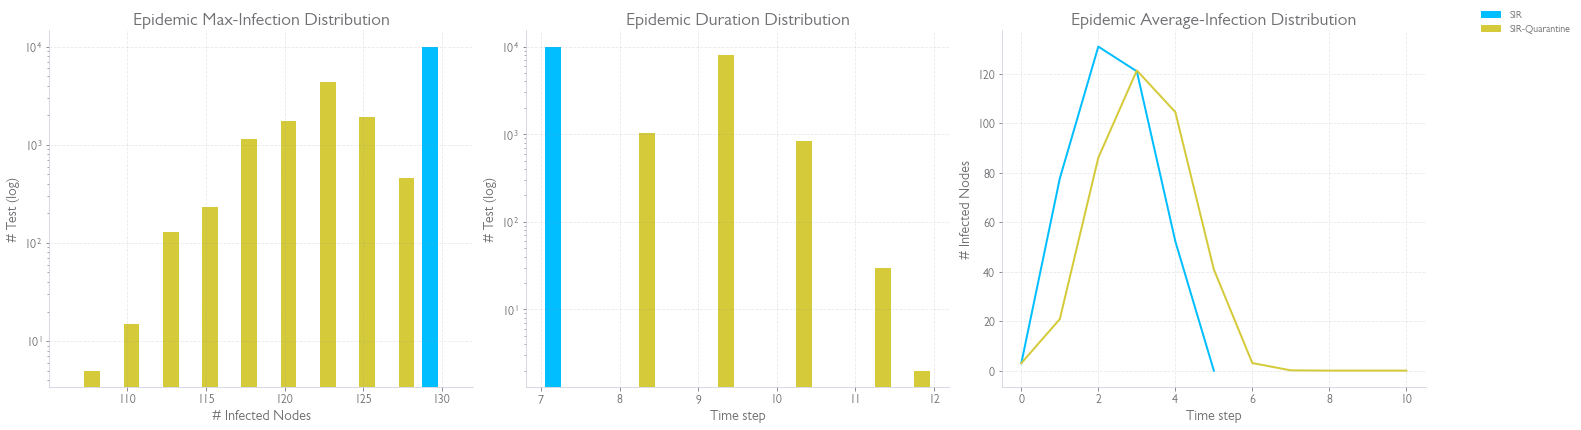

In [11]:
# PLOT RETE AGGREGATA CON PESI
fig, axes = plt.subplots(1,3, figsize=(20,6))
plot_distributions(aggregated_data, axes)

dviz.add_legend(fig, axes, on_fig=True)

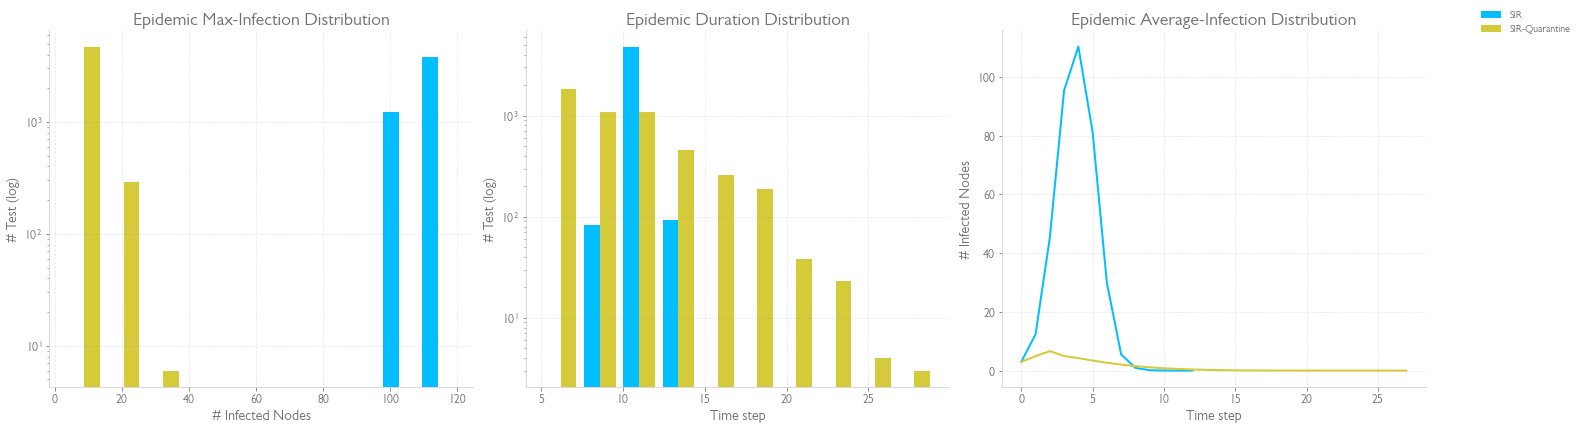

In [12]:
# PLOT RETE AGGREGATA SENZA PESI
fig, axes = plt.subplots(1,3, figsize=(20,6))
plot_distributions(aggregated_data_noweight, axes, no_weight=True)

dviz.add_legend(fig, axes, on_fig=True)

Stampa dati temporali

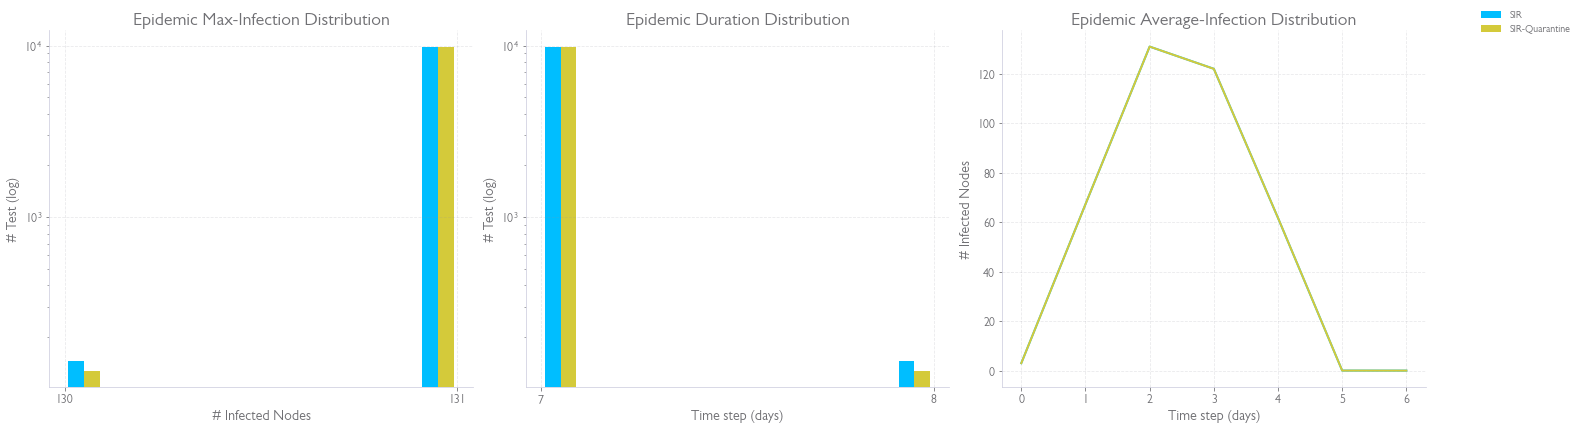

In [14]:
# PLOT RETE TEMPORALE CON PESI
fig, axes = plt.subplots(1,3, figsize=(20,6))
plot_distributions(temporal_data, axes, aggregated=False)

dviz.add_legend(fig, axes, on_fig=True)

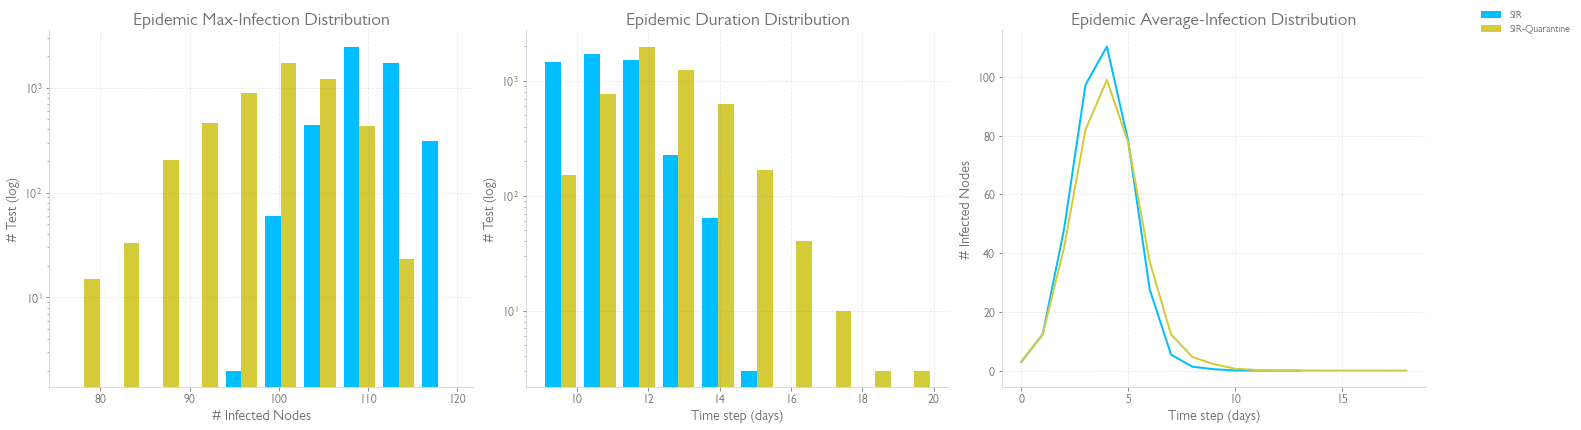

In [15]:
# PLOT RETE TEMPORALE SENZA PESI
fig, axes = plt.subplots(1,3, figsize=(20,6))
plot_distributions(temporal_data_noweight, axes, aggregated=False, no_weight=True)

dviz.add_legend(fig, axes, on_fig=True)

## Export Data

In [16]:
from pathlib import Path
import string

def setup_figure_for_export(fig):
  # no title since we'll add a caption, but add a panel with letter 
  if len(fig.axes) > 1:
    for ax, panel_label in zip(fig.axes, string.ascii_uppercase):
      ax.set_title("")
      ax.text(0.97, 1., panel_label, transform=ax.transAxes, fontsize=16, fontweight='bold', va='top')
  else:
    fig.axes[0].set_title("")
  return fig

In [17]:
from pathlib import Path

EXPORT_DIR = Path("export")
dviz.export_figures(EXPORT_DIR, figures, formatting_exceptions=[])

saving export/epidemic_aggregated_distributions.pdf
saving export/epidemic_aggregated_distributions.png
saving export/epidemic_aggregated_distributions_noweight.pdf
saving export/epidemic_aggregated_distributions_noweight.png
saving export/epidemic_temporal_distributions.pdf
saving export/epidemic_temporal_distributions.png
saving export/epidemic_temporal_distributions_noweight.pdf
saving export/epidemic_temporal_distributions_noweight.png
